In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import preprocessing
le = preprocessing.LabelEncoder()
import math 
from ast import literal_eval
import pickle

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
!cp  /content/drive/MyDrive/Updated_Dateset_v5.zip /content/

In [ ]:
!unzip  Updated_Dateset_v5.zip

Archive:  Updated_Dateset_v5.zip
  inflating: cdn_final_final.csv     
  inflating: cloud_final_final.csv   
  inflating: hosting_final_final.csv  
  inflating: proxy_final_final.csv   
  inflating: vpn_final_final.csv     


In [ ]:
sample_size = 30000
df = pd.read_csv('cdn_final_final.csv')
#df['vendor']= ['cdn' for x in range(df.shape[0])]
df = df.sample(n = sample_size)
df1 = pd.read_csv('cloud_final_final.csv')
#df1['vendor']= ['cloud' for x in range(df1.shape[0])]
df1 = df1.sample(n = sample_size)
df2 = pd.read_csv('hosting_final_final.csv')
#df2['vendor']= ['hosting' for x in range(df2.shape[0])]
df2 = df2.sample(n = sample_size)
df3 = pd.read_csv('vpn_final_final.csv')
#df3['vendor']= ['vpn' for x in range(df3.shape[0])]
#df3 = df3.sample(n = 15000)
df4 = pd.read_csv('proxy_final_final.csv')
#df4 = df4.sample(n = 9200)

df = df.append([df1,df2,df3,df4],ignore_index=True)

/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (25) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)
/usr/local/lib/python3.7/dist-packages/IPython/core/interactiveshell.py:2882: DtypeWarning: Columns (31) have mixed types.Specify dtype option on import or set low_memory=False.
  exec(code_obj, self.user_global_ns, self.user_ns)


In [ ]:
df['data.http.result.response.headers.content_type.0'].count()

91897

In [ ]:
df['data.http.result.response.headers.connection.0'].count()

64716

In [ ]:
df.columns

Index(['ip', 'No Of Owners', 'CIDR', 'netType', 'Organization',
       'Most Recent Update', 'No of Who is Records',
       'data.http.result.response.headers.server.0',
       'data.http.result.response.status_code',
       'data.http.result.response.headers.unknown.0.key',
       'data.http.result.response.headers.unknown.0.value.0',
       'data.http.result.response.headers.connection.0',
       'data.http.result.response.headers.via.0',
       'data.http.result.response.headers.unknown.1.key',
       'data.http.result.response.headers.unknown.1.value.0',
       'data.http.result.response.headers.accept_ranges.0',
       'data.http.result.response.headers.cache_control.0',
       'data.http.result.response.headers.retry_after.0',
       'data.http.result.response.body',
       'data.http.result.response.body_sha256',
       'data.http.result.response.content_length',
       'data.http.result.response.headers.content_type.0',
       'data.http.result.response.headers.location.0',
   

In [ ]:
renameDict = {
       'data.http.result.response.headers.server.0':'data.http.result.response.headers.server',
       'data.http.result.response.headers.connection.0':'data.http.result.response.headers.connection',
       'data.http.result.response.headers.via.0':'data.http.result.response.headers.via',
       'data.http.result.response.headers.accept_ranges.0': 'data.http.result.response.headers.accept_ranges',
       'data.http.result.response.headers.cache_control.0':'data.http.result.response.headers.cache_control',
       'data.http.result.response.headers.retry_after.0':'data.http.result.response.headers.retry_after',
       'data.http.result.response.headers.content_type.0':'data.http.result.response.headers.content_type',
       'data.http.result.response.headers.location.0': 'data.http.result.response.headers.location',
       'data.http.result.redirect_response_chain.0.status_line':'data.http.result.redirect_response_chain.status_line',
       'data.http.result.response.headers.etag.0':'data.http.result.response.headers.etag',
       'data.http.result.response.headers.last_modified.0':'data.http.result.response.headers.last_modified',
       'data.http.result.response.headers.vary.0':'data.http.result.response.headers.vary',
       'data.http.result.response.transfer_encoding.0': 'data.http.result.response.transfer_encoding',
       'data.http.result.response.headers.x_powered_by.0':'data.http.result.response.headers.x_powered_by',
       'data.http.result.response.headers.pragma.0':'data.http.result.response.headers.pragma',
       'data.http.result.redirect_response_chain.0.headers.server.0':'data.http.result.redirect_response_chain.headers.server'
}

In [ ]:
df.rename(columns=renameDict, errors="raise",inplace=True)

In [ ]:
catfields = [ 'netType', 
              #'Organization',
              'data.http.result.response.headers.server',
               'data.http.result.response.status_code',
              'data.http.result.response.headers.connection',
              'data.http.result.response.headers.via',
              'data.http.result.response.headers.accept_ranges',
              'data.http.result.response.headers.cache_control',
              'data.http.result.response.headers.retry_after',
             # 'data.http.result.response.body',
             # 'data.http.result.response.body_sha256',
              'data.http.result.response.headers.content_type',
              'data.http.result.response.headers.location',
             # 'data.http.result.redirect_response_chain.status_line',
              'data.http.result.response.headers.etag',
              #'data.http.result.response.headers.vary',
              #'data.http.result.response.transfer_encoding',
             # 'data.http.result.response.headers.x_powered_by',
              #'data.http.result.response.headers.pragma',
              'as_name', 'as_no',
              'data.tls.status',
              'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country',
              'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization',
              #'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name',
              #'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country',
              'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality',
              #'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province',
              'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization',
              'vendor'
       ]

In [ ]:
def getgeneralCloudfront(x):
  if('(CloudFront)' in str(x)):
      return 'CloudFront'
  else:
      return x

def getgeneralServerNames(x):
  if('nginx' in str(x)):
      return 'nginx'
  elif('Apache' in str(x)):
      return 'Apache'
  else:
      return x

def getgeneralphp(x):
  if (pd.isna(x)):
    return -1
  else:
    if('PHP' in x):
      return 'PHP'

def changenullaszero(x):
  if (pd.isna(x)): 
    return -1
  else:
    return 1

def getCIDRBlockLength(ipadd):
   if(pd.isna(ipadd)):
     return 0
   else:
      if(len(ipadd.split(','))==1):
        return (2**(32-int(ipadd.split('/')[1])))
      else:
        sum=0
        for i in ipadd.split(','):
          sum=sum + (2**(32-int(i.split('/')[1])))
        return sum 

def arrayLiteral(stringarray):
  if(pd.isna(stringarray)):
     return 0
  return len(literal_eval(stringarray))

def removeSquareBrackets(text):
  if(pd.isna(text)):
     return -1
  return literal_eval(text)[0];

def featureImportance(clf):
  importance = clf.feature_importances_
  importancelist = []
  for i,v in enumerate(importance):
    importancelist.append([df.columns[i],v])
  importantdf = pd.DataFrame(importancelist)
  importantdf.columns = ['Feature','Importance']
  importantdf = importantdf.sort_values(by=['Importance'],ascending=False)
  #importantdf = importantdf[:15]
  #importantdf = importantdf[::-1]
  print(importantdf)
  fig = importantdf.plot.barh(x='Feature', y='Importance', rot=0,figsize=(10,20),title = "Top Features")
  #plt.savefig(vendorname.capitalize() + " Top 15 Features"+'.png',bbox_inches='tight')
  return importantdf

In [ ]:
#df['data.http.result.response.headers.via']  = df["data.http.result.response.headers.via"].apply(getgeneralCloudfront)
df['data.http.result.response.status_code'].fillna(-1, inplace=True)
df['data.http.result.response.headers.pragma'].fillna(-1, inplace=True)
df['data.http.result.response.headers.connection'].fillna(-1, inplace=True)
df['data.http.result.response.headers.via']  = df["data.http.result.response.headers.via"].apply(changenullaszero)
df['data.http.result.response.headers.via'].fillna(-1, inplace=True)
df['data.http.result.response.headers.accept_ranges'].fillna(-1, inplace=True)
df['data.http.result.response.headers.cache_control'].fillna(-1, inplace=True)
df['data.http.result.response.headers.retry_after'].fillna(-1, inplace=True)
df['data.http.result.response.body']  = df["data.http.result.response.body"].apply(changenullaszero)
df['data.http.result.response.body_sha256']  = df['data.http.result.response.body_sha256'].apply(changenullaszero)
df['data.http.result.response.content_length'].fillna(0, inplace=True)
df['data.http.result.response.headers.content_type'].fillna(-1, inplace=True)
df['data.http.result.response.headers.location'] = df['data.http.result.response.headers.location'].apply(changenullaszero)
df['data.http.result.redirect_response_chain.status_line'].fillna(-1, inplace=True)
df['data.http.result.response.headers.etag'] = df['data.http.result.response.headers.etag'].apply(changenullaszero)
df['data.http.result.response.headers.last_modified']  = df['data.http.result.response.headers.last_modified'].apply(changenullaszero)
df['data.http.result.response.headers.vary'].fillna(-1, inplace=True)
df['data.http.result.response.transfer_encoding'].fillna(-1, inplace=True)
df['data.http.result.response.headers.x_powered_by']  = df['data.http.result.response.headers.x_powered_by'].apply(getgeneralphp)
#df['data.http.result.response.headers.x_powered_by'].fillna(-1, inplace=True)

df['data.http.result.response.headers.server']  = df['data.http.result.response.headers.server'].apply(getgeneralServerNames)
df['data.http.result.response.headers.server'].fillna(-1, inplace=True)

In [ ]:
# df['data.http.result.response.headers.server'] = le.fit_transform(df['data.http.result.response.headers.server'].astype(str))
# df['data.http.result.response.status_code'] = le.fit_transform(df['data.http.result.response.status_code'].astype(str))
# df['data.http.result.response.headers.connection'] = le.fit_transform(df['data.http.result.response.headers.connection'].astype(str))
# df['data.http.result.response.headers.via'] = le.fit_transform(df['data.http.result.response.headers.via'].astype(str))
# df['data.http.result.response.headers.accept_ranges'] = le.fit_transform(df['data.http.result.response.headers.accept_ranges'].astype(str))
# df['data.http.result.response.headers.cache_control'] = le.fit_transform(df['data.http.result.response.headers.cache_control'].astype(str))
# df['data.http.result.response.headers.retry_after'] = le.fit_transform(df['data.http.result.response.headers.retry_after'].astype(str))
# df['data.http.result.response.body'] = le.fit_transform(df['data.http.result.response.body'].astype(str))
# df['data.http.result.response.body_sha256'] = le.fit_transform(df['data.http.result.response.body_sha256'].astype(str))
# df['data.http.result.response.headers.content_type'] = le.fit_transform(df['data.http.result.response.headers.content_type'].astype(str))

# df['data.http.result.response.headers.location'] = le.fit_transform(df['data.http.result.response.headers.location'].astype(str))
# df['data.http.result.redirect_response_chain.status_line'] = le.fit_transform(df['data.http.result.redirect_response_chain.status_line'].astype(str))
# df['data.http.result.response.headers.etag'] = le.fit_transform(df['data.http.result.response.headers.etag'].astype(str))
# df['data.http.result.response.headers.last_modified'] = le.fit_transform(df['data.http.result.response.headers.last_modified'].astype(str))
# df['data.http.result.response.headers.vary'] = le.fit_transform(df['data.http.result.response.headers.vary'].astype(str))
# df['data.http.result.response.transfer_encoding'] = le.fit_transform(df['data.http.result.response.transfer_encoding'].astype(str))

# df['data.http.result.response.headers.x_powered_by'] = le.fit_transform(df['data.http.result.response.headers.x_powered_by'].astype(str))
# df['data.http.result.response.headers.pragma'] = le.fit_transform(df['data.http.result.response.headers.pragma'].astype(str))
# df['as_name'] = le.fit_transform(df['as_name'].astype(str))

# df['as_no'] = le.fit_transform(df['as_no'].astype(str))
# df['vendor'] = le.fit_transform(df['vendor'].astype(str))
# vendorEncodings = le.classes_

In [ ]:
#df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'].apply(changenullaszero)

In [ ]:
df['netSize']  = df["CIDR"].apply(getCIDRBlockLength)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality'].apply(removeSquareBrackets)
df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization'].apply(removeSquareBrackets)
df['SAN Count']  =  df['data.tls.result.handshake_log.server_certificates.certificate.parsed.extensions.subject_alt_name.dns_names'].apply(arrayLiteral)

In [ ]:
df['Organization'].fillna(-1, inplace=True)
df['netType'].fillna(-1, inplace=True)
df['No of Who is Records'].fillna(0, inplace=True)
df['Most Recent Update'].fillna(0, inplace=True)

In [ ]:
# df['Organization'] = le.fit_transform(df['Organization'].astype(str))
# df['netType'] = le.fit_transform(df['netType'].astype(str))

# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality'].astype(str))
# df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization'] = le.fit_transform(df['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization'].astype(str))
# df['data.tls.status'] = le.fit_transform(df['data.tls.status'].astype(str))

In [ ]:
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer_dn'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject_dn'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.extensions.subject_alt_name.dns_names'],axis=1)
df = df.drop(['No Of Owners'],axis=1)
df = df.drop(['CIDR'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.0.key'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.0.value.0'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.1.key'],axis=1)
df = df.drop(['data.http.result.response.headers.unknown.1.value.0'],axis=1)
df = df.drop(['ip'],axis=1)
df = df.drop(['Unnamed: 0_y'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.common_name'],axis=1)


#Reducing the Insignificant Features
df = df.drop(['data.http.result.response.transfer_encoding'],axis=1)
df = df.drop(['data.http.result.response.headers.x_powered_by'],axis=1)
df = df.drop(['data.http.result.response.headers.pragma'],axis=1)
df = df.drop(['data.http.result.redirect_response_chain.headers.server'],axis=1)
df = df.drop(['data.http.result.redirect_response_chain.status_line'],axis=1)
df = df.drop(['data.http.result.response.headers.last_modified'],axis=1)
df = df.drop(['data.http.result.response.body_sha256'],axis=1)
df = df.drop(['data.http.result.response.headers.vary'],axis=1)
df = df.drop(['data.http.result.response.body'],axis=1)

df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.country'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.province'],axis=1)
df = df.drop(['data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.common_name'],axis=1)

#Unsure Significant Features
df = df.drop(['Organization'],axis=1)

In [ ]:
categoricalDf = df[catfields]
df.drop(catfields, axis=1, inplace=True)
df

,Most Recent Update,No of Who is Records,data.http.result.response.content_length,netSize,SAN Count
0,1.632096e+09,4.0,245.0,65536,28
1,1.585613e+09,2.0,915.0,131072,1
2,1.585613e+09,2.0,915.0,262144,1
3,0.000000e+00,0.0,247.0,0,11
4,0.000000e+00,0.0,0.0,0,11
...,...,...,...,...,...
121048,1.472602e+09,1.0,0.0,16,0
121049,1.488331e+09,2.0,0.0,16777216,0
121050,1.521072e+09,1.0,0.0,16777216,0
121051,1.363599e+09,2.0,0.0,16777216,0


In [ ]:
from sklearn.preprocessing import LabelEncoder
import collections
#df = df.astype(str).apply(LabelEncoder().fit_transform)

In [ ]:
encoder_dict = collections.defaultdict(LabelEncoder)
categoricalDfEncoded = categoricalDf.astype(str).apply(lambda x: encoder_dict[x.name].fit_transform(x))

In [ ]:
with open('label_encodings','wb') as f:
  pickle.dump(encoder_dict,f)

In [ ]:
categoricalDfEncoded

,netType,data.http.result.response.headers.server,data.http.result.response.status_code,data.http.result.response.headers.connection,data.http.result.response.headers.via,data.http.result.response.headers.accept_ranges,data.http.result.response.headers.cache_control,data.http.result.response.headers.retry_after,data.http.result.response.headers.content_type,data.http.result.response.headers.location,data.http.result.response.headers.etag,as_name,as_no,data.tls.status,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization,vendor
0,6,362,28,7,1,1,212,1,44,0,0,996,2483,2,75,66,2,238,0
1,11,67,14,7,1,0,0,0,44,0,0,92,569,2,75,52,2,11,0
2,5,67,14,7,1,0,0,0,44,0,0,92,569,2,75,52,2,11,0
3,0,362,28,7,1,1,212,1,44,0,0,996,2483,2,11,279,1029,1103,0
4,0,1,0,0,0,0,0,0,2,0,0,996,2483,2,11,279,1029,1103,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121048,12,1,0,0,0,0,0,0,2,0,0,666,2784,0,1,4,2,11,3
121049,1,1,0,0,0,0,0,0,2,0,0,471,310,0,1,4,2,11,3
121050,3,1,0,0,0,0,0,0,2,0,0,712,1499,0,1,4,2,11,3
121051,1,1,0,0,0,0,0,0,2,0,0,2223,2149,0,1,4,2,11,3


In [ ]:
df[catfields] = categoricalDfEncoded

In [ ]:
df

,Most Recent Update,No of Who is Records,data.http.result.response.content_length,netSize,SAN Count,netType,data.http.result.response.headers.server,data.http.result.response.status_code,data.http.result.response.headers.connection,data.http.result.response.headers.via,...,data.http.result.response.headers.location,data.http.result.response.headers.etag,as_name,as_no,data.tls.status,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country,data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality,data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization,vendor
0,1.632096e+09,4.0,245.0,65536,28,6,362,28,7,1,...,0,0,996,2483,2,75,66,2,238,0
1,1.585613e+09,2.0,915.0,131072,1,11,67,14,7,1,...,0,0,92,569,2,75,52,2,11,0
2,1.585613e+09,2.0,915.0,262144,1,5,67,14,7,1,...,0,0,92,569,2,75,52,2,11,0
3,0.000000e+00,0.0,247.0,0,11,0,362,28,7,1,...,0,0,996,2483,2,11,279,1029,1103,0
4,0.000000e+00,0.0,0.0,0,11,0,1,0,0,0,...,0,0,996,2483,2,11,279,1029,1103,0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
121048,1.472602e+09,1.0,0.0,16,0,12,1,0,0,0,...,0,0,666,2784,0,1,4,2,11,3
121049,1.488331e+09,2.0,0.0,16777216,0,1,1,0,0,0,...,0,0,471,310,0,1,4,2,11,3
121050,1.521072e+09,1.0,0.0,16777216,0,3,1,0,0,0,...,0,0,712,1499,0,1,4,2,11,3
121051,1.363599e+09,2.0,0.0,16777216,0,1,1,0,0,0,...,0,0,2223,2149,0,1,4,2,11,3


In [ ]:
#encoder_dict['as_name'].classes_

In [ ]:
#inverse_transform_lambda = lambda x: encoder_dict[x.name].inverse_transform(x)

In [ ]:
#labeled_df.apply(inverse_transform_lambda)

In [ ]:
#df.corr()

In [ ]:
# import matplotlib.pyplot as plt
# import seaborn as sns
# plt.figure(figsize=(40,40))
# cor = df.corr()
# sns.heatmap(cor,annot=True)
# plt.show()

In [ ]:
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor

In [ ]:
vendor_encoded = df['vendor'].values

In [ ]:
df = df.drop(['vendor'],axis=1)

In [ ]:
from imblearn.over_sampling import RandomOverSampler
ros = RandomOverSampler(random_state=0)
X_resampled, y_resampled = ros.fit_resample(df, vendor_encoded)

In [ ]:
fields = df.columns.values

In [ ]:
#X_train, X_test, y_train, y_test = train_test_split(X_resampled, y_resampled, test_size=0.3, random_state=42)

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_resampled,y_resampled,test_size=0.3,random_state=42)
x_Eval, X_test, y_Eval, y_test = train_test_split(X_test,y_test,test_size = 0.33,random_state=42)

In [ ]:
clf = RandomForestClassifier(max_depth=12)
clf.fit(X_train, y_train) 
y_pred = clf.predict(X_test)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
print(confusion_matrix(y_test,y_pred))
print(classification_report(y_test,y_pred))
print(accuracy_score(y_test,y_pred))

[[2972    2    0    0    4]
 [  28 2374    0    2  597]
 [   0    0 2969    4    0]
 [   1   15    9 2881   14]
 [  11  230    3    2 2732]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      2978
           1       0.91      0.79      0.84      3001
           2       1.00      1.00      1.00      2973
           3       1.00      0.99      0.99      2920
           4       0.82      0.92      0.86      2978

    accuracy                           0.94     14850
   macro avg       0.94      0.94      0.94     14850
weighted avg       0.94      0.94      0.94     14850

0.9379124579124579


In [ ]:
y_pred = clf.predict(x_Eval)

In [ ]:
from sklearn.metrics import classification_report,confusion_matrix,accuracy_score
from sklearn.metrics import f1_score
print(confusion_matrix(y_Eval,y_pred))
print(classification_report(y_Eval,y_pred))
print(accuracy_score(y_Eval,y_pred))

[[5926    8    0    0    5]
 [  36 4853    1    5 1153]
 [   0    0 5973    3    0]
 [   5   32   17 5968   30]
 [  33  447    8    7 5640]]
              precision    recall  f1-score   support

           0       0.99      1.00      0.99      5939
           1       0.91      0.80      0.85      6048
           2       1.00      1.00      1.00      5976
           3       1.00      0.99      0.99      6052
           4       0.83      0.92      0.87      6135

    accuracy                           0.94     30150
   macro avg       0.94      0.94      0.94     30150
weighted avg       0.94      0.94      0.94     30150

0.9406301824212272


In [ ]:
from joblib import dump, load
dump(clf, 'rndfrst.joblib') 

['rndfrst.joblib']

                                              Feature  Importance
17                                              as_no    0.154425
16                                            as_name    0.135096
18                                    data.tls.status    0.120860
9               data.http.result.response.headers.via    0.093021
3                                             netSize    0.080505
20  data.tls.result.handshake_log.server_certifica...    0.062393
7               data.http.result.response.status_code    0.058508
6            data.http.result.response.headers.server    0.049402
2            data.http.result.response.content_length    0.043348
4                                           SAN Count    0.029616
19  data.tls.result.handshake_log.server_certifica...    0.028825
5                                             netType    0.027678
13     data.http.result.response.headers.content_type    0.027590
8        data.http.result.response.headers.connection    0.025021
0         

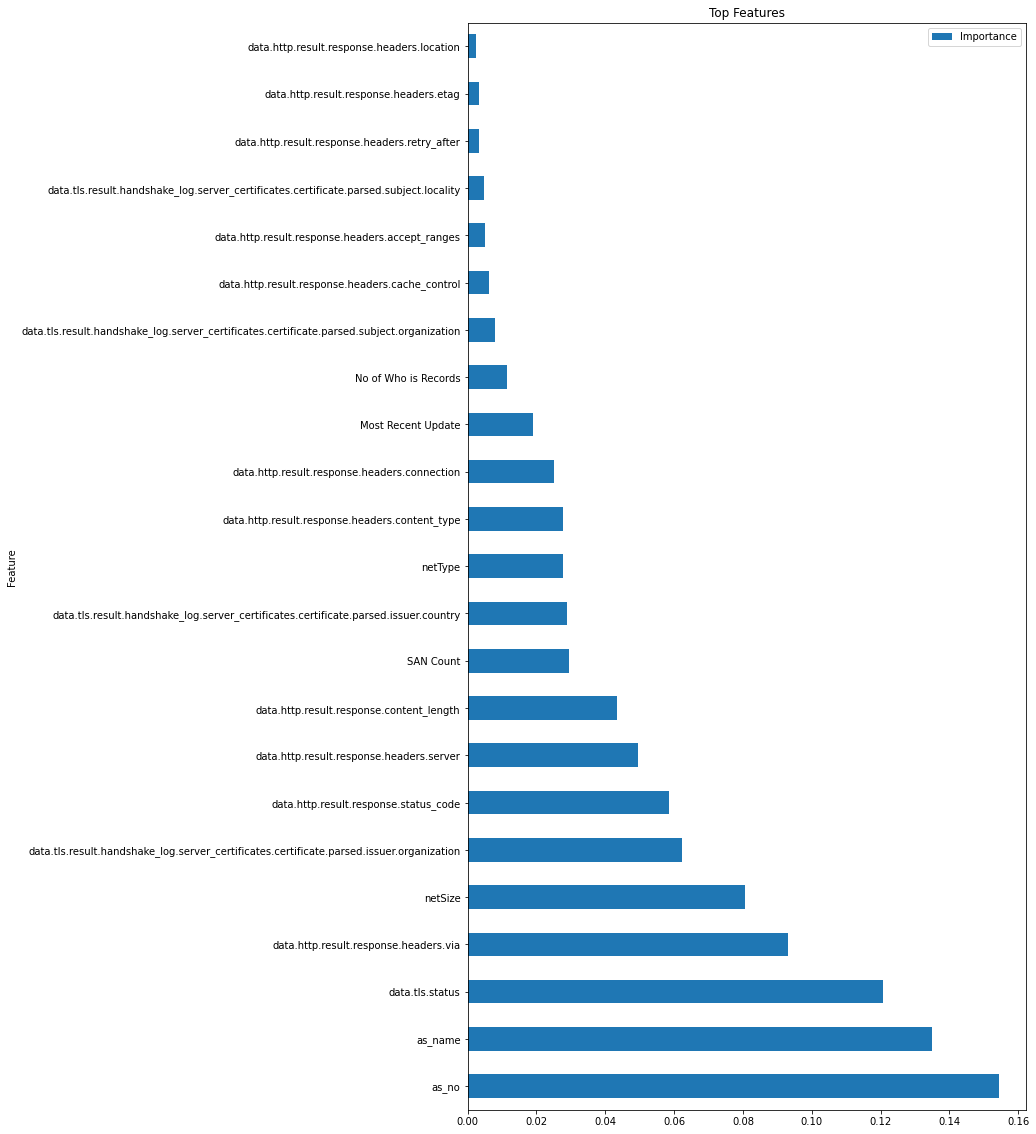

In [ ]:
featurelistdf = featureImportance(clf)

In [ ]:
featurelistdf['Feature'].values[:10]

array(['as_no', 'as_name', 'data.tls.status',
       'data.http.result.response.headers.via', 'netSize',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization',
       'data.http.result.response.status_code',
       'data.http.result.response.headers.server',
       'data.http.result.response.content_length', 'SAN Count'],
      dtype=object)

In [ ]:
accuracylist = []
f1score = []

for i in featurelistdf['Feature'].values[:20]:
  X_train = X_train.drop([i],axis=1)
  X_test = X_test.drop([i],axis=1)
  clf = RandomForestClassifier(max_depth=12)
  clf.fit(X_train, y_train) 
  y_pred = clf.predict(X_test)
  print(f1_score(y_test, y_pred, average='macro'))
  print(accuracy_score(y_test,y_pred))
  print('\n')
  accuracylist.append(accuracy_score(y_test,y_pred))
  f1score.append(f1_score(y_test, y_pred, average='macro'))

0.9319633318790654
0.9315824915824916


0.8918356221392381
0.8911111111111111


0.8837737180529427
0.8842424242424243


0.8839149863014587
0.8843097643097643


0.8400438112423785
0.8442424242424242


0.8354077212279541
0.8397979797979798


0.835302341482226
0.8395959595959596


0.8279100424211465
0.8321885521885521


0.8164570485030204
0.8214814814814815


0.8139757885379071
0.8197979797979797


0.7990146903816451
0.8043097643097643


0.7687782261380666
0.7762289562289563


0.7404437133875148
0.7508417508417509


0.6979358625930822
0.7039057239057239


0.5250349646296416
0.5447138047138047


0.46782087744740064
0.49508417508417507


0.4428373486203239
0.4723232323232323


0.38222989765941895
0.4212121212121212


0.32471043086008555
0.37313131313131315


0.25893609564297626
0.3255892255892256




In [ ]:
renameDict = {
       'data.http.result.response.headers.via':'Via',
       'data.http.result.response.content_length': 'Content_Length',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.organization':'Certificate_Issuer_Org',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.issuer.country':'Certificate_Issuer_Country',
       'data.http.result.response.status_code':'Status_Code',
       'data.http.result.response.headers.server': 'Server',
       'data.http.result.response.headers.connection':'Connection',
       'data.http.result.response.headers.content_type':'Content_Type',
       'data.http.result.response.headers.cache_control':'Cache_control',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.locality':'X.509_Subject_Locality',
       'data.tls.result.handshake_log.server_certificates.certificate.parsed.subject.organization':'X.509_Subject _Org',
       'data.http.result.response.headers.accept_ranges':'Accept_Ranges',
       'data.http.result.response.headers.retry_after':'Retry_After',
       'data.http.result.response.headers.location':'Location'
}

In [ ]:
featurelistarray = featurelistdf['Feature'].values[:20]

In [ ]:
for i in range(len(featurelistarray)):
  if renameDict.get(featurelistarray[i]):
    featurelistarray[i]=renameDict.get(featurelistarray[i])

In [ ]:
dropfeaturedf = pd.DataFrame(featurelistarray,columns=["features"])
dropfeaturedf['Accuracy'] = pd.DataFrame(accuracylist)
dropfeaturedf['F1 Score'] = pd.DataFrame(f1score)
dropfeaturedf.set_index('features')

,Accuracy,F1 Score
features,,
as_no,0.931582,0.931963
as_name,0.891111,0.891836
data.tls.status,0.884242,0.883774
Via,0.884310,0.883915
netSize,0.844242,0.840044
Certificate_Issuer_Org,0.839798,0.835408
Status_Code,0.839596,0.835302
Server,0.832189,0.827910
Content_Length,0.821481,0.816457


Text(0.5, 1.0, 'Feature Drop Analysis')

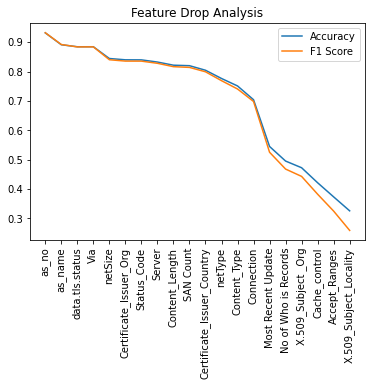

In [ ]:
ax = dropfeaturedf.plot.line()
ax.set_xticks(dropfeaturedf.index)
ax.set_xticklabels(dropfeaturedf.features, rotation=90)
ax.set_title('Feature Drop Analysis')